In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import lvmnebular
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as unit
pc=unit.parsec

1.5 pc


In [3]:
u=lvmnebular.simulation()
u.loadsim('Bubble_v2_5e-14',900) #native simulation
#u.loadsim('Bubble_v2_5e-14', 900, vorbin=True) #voronoi simulation
#u.loadsim('Bubble_v2_5e-14', 900, snbin=True) #snbin simulation


Loading simulation: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14

Loading simfile: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/outputs/Bubble_v2_5e-14_linear_full_900_flux.fits
no.of bins: 169


In [4]:
#native simulation
u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, rbinmax=260, drbin=15, loadfile=True, plot=False) #native sim

#voronoibin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=True, rbinmax=260, drbin=15, loadfile=False, plot=False) #voronoi sim

#radbin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=True, vorbin=False, rbinmax=260, drbin=15, loadfile=True, plot=False) #radbin sim

#snbin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069,7320, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, snbin=True, rbinmax=260, drbin=15, loadfile=False, plot=False) #voronoi sim


Fitting Emmission Lines: ['9069' '7319' '7320' '7330' '7331' '6731' '6717' '6584' '6563' '6548'
 '6312' '5755' '5007' '4959' '4861' '4363' '4069' '4076' '3970' '3729'
 '3726']
linefitfile: Bubble_v2_5e-14/Bubble_v2_5e-14_linefits.fits


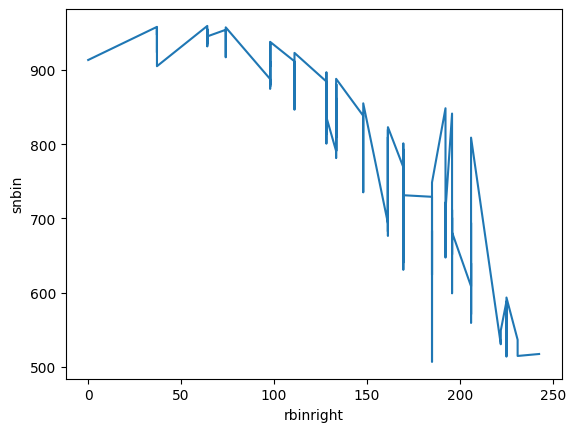

In [48]:
u.sn_radialbin(target_sn=500, lineid='6563', rmin=0, rmax=250, pertsim=False)
#print(u.snbinned_flux, u.flux)


48
[[ 1.88423089e-14  8.18830985e-15 -1.22387435e-14 ...  2.06153060e-15
   1.64401440e-15 -7.84160317e-15]
 [ 1.00003319e-14 -2.76717299e-15  3.19812599e-15 ... -3.69921353e-15
  -2.96248757e-14 -3.90101617e-15]
 [-1.83954143e-14 -4.03355904e-15 -4.18680559e-14 ... -5.11214400e-16
  -9.01912890e-15 -1.12372058e-14]
 ...
 [ 3.11748867e-14  4.92634362e-18 -2.47810077e-15 ...  1.87315428e-14
  -5.61103423e-16  5.37985861e-15]
 [ 1.10195649e-14  4.51174801e-14 -7.88626637e-16 ...  1.04967234e-14
   1.91482174e-15  2.36952173e-14]
 [-2.28796135e-15 -3.56542332e-14  2.93109208e-15 ... -1.13043581e-14
  -1.87285481e-14 -1.86903326e-14]]


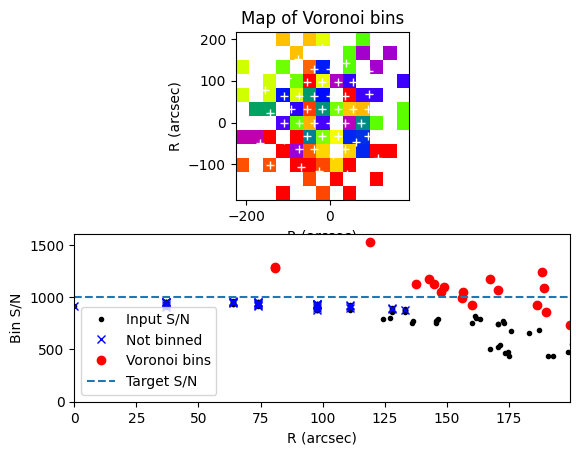

In [39]:
u.voronoibin(target_sn=1000, lineid='6563') #Caution: run once after fitting lines in native simulation

In [5]:
u.runpyneb(niter=4, pertsim=False)

warng _ManageAtomicData: rec data not available for Al2
warng _ManageAtomicData: rec data not available for Ar2
warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: rec data not available for Ar4
warng _ManageAtomicData: rec data not available for Ar5
warng _ManageAtomicData: rec data not available for Ba2
warng _ManageAtomicData: rec data not available for Ba4
ERROR None: No data for this case B
ERROR None: No data for this case B
warng _ManageAtomicData: rec data not available for Ca5
warng _ManageAtomicData: rec data not available for Cl2
warng _ManageAtomicData: rec data not available for Cl3
warng _ManageAtomicData: rec data not available for Cl4
warng _ManageAtomicData: rec data not available for Fe3
warng _ManageAtomicData: rec data not available for K4
warng _ManageAtomicData: rec data not available for K5
warng _ManageAtomicData: rec data not available for Mg5
warng _ManageAtomicData: rec data not available for Mg7
ERROR None: No data for this case 

/home/amrita/LVM/lvmnebular/lvmnebular.py:349: RuntimeWarning: Mean of empty slice
  self.TeO2 = np.nanmean(TO2, axis=1)
/home/amrita/miniconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/amrita/LVM/lvmnebular/lvmnebular.py:366: RuntimeWarning: Mean of empty slice
  self.TeO3 = np.nanmean(TO3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:382: RuntimeWarning: Mean of empty slice
  self.TeN2 = np.nanmean(TN2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:401: RuntimeWarning: Mean of empty slice
  self.TeS2 = np.nanmean(TS2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:418: RuntimeWarning: Mean of empty slice
  self.TeS3 = np.nanmean(TS3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:436: RuntimeWarning: Mean of empty slice
  self.neO2 = np.nanmean(NO2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:450: RuntimeWarning: Mean of empty

/home/amrita/LVM/lvmnebular/lvmnebular.py:754: RuntimeWarning: invalid value encountered in scalar divide
  Teproj[i]=trapezoid(T0aux*aaux*np.cos(theta)**(-2), x=theta)/trapezoid(aaux*np.cos(theta)**(-2), x=theta)


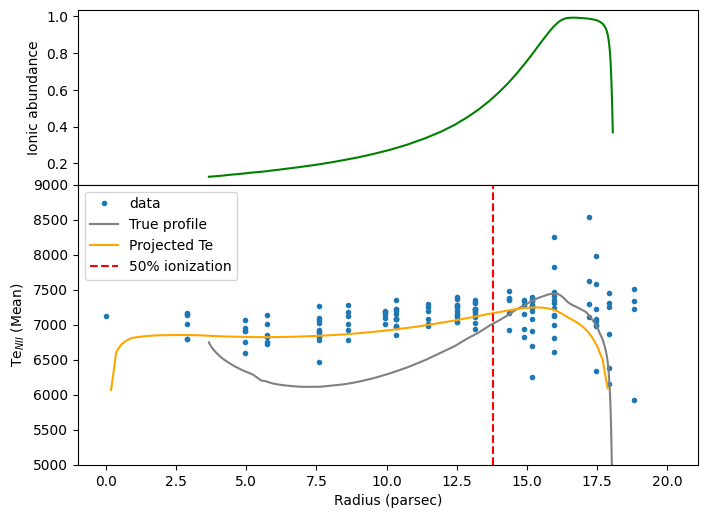

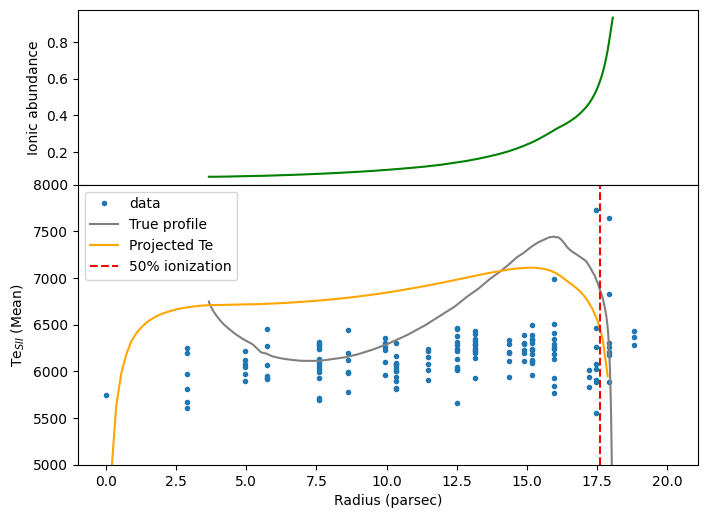

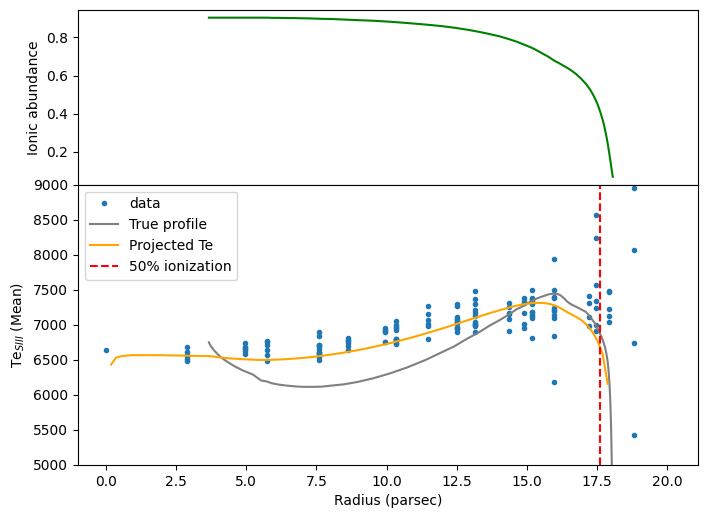

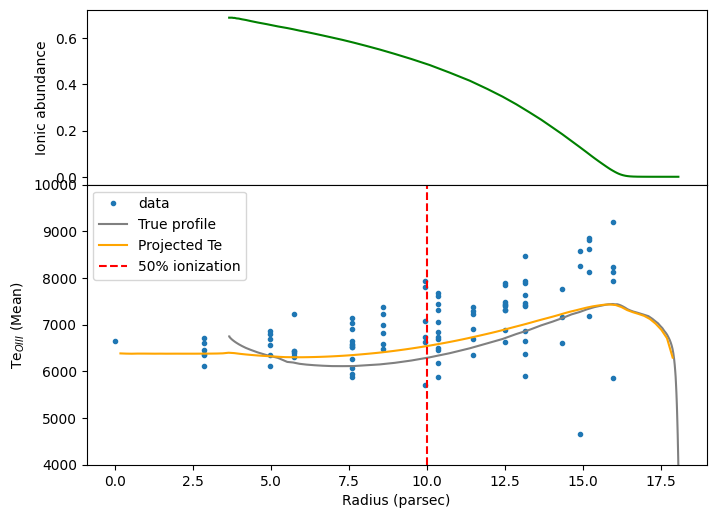

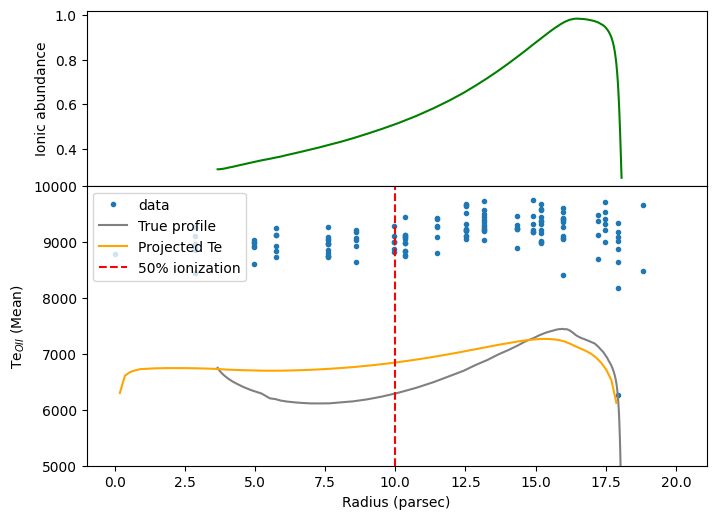

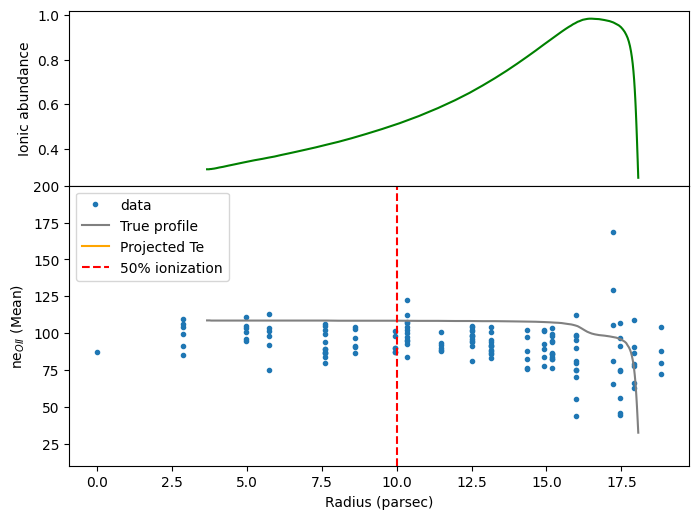

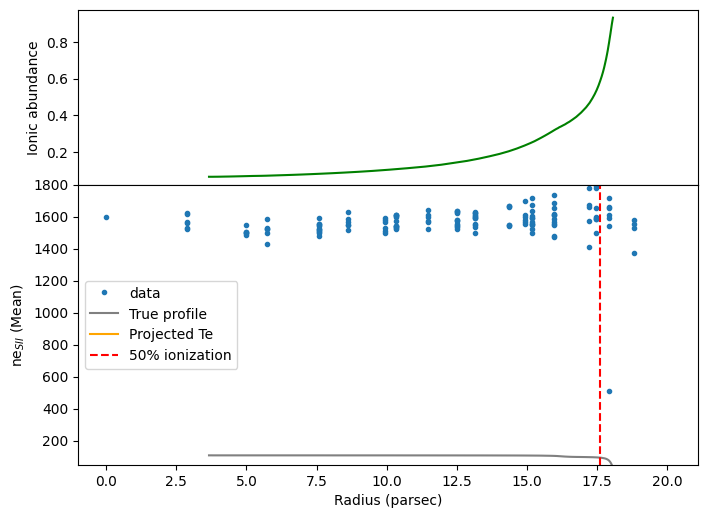

In [5]:
#0:Radius’, 1:'Te', 2:'ne', 3:'H+', 4:'O0', 5:'O+', 6:'O++', 7:'N0', 8:'N+', 9:'N++', 10:'S0', 11:'S+', 12:'S++
#overplotprofile(self, z=TeO3, val1=vals[1], val2=vals[8], min=0, max=250, x=17.6, n=100, title='line_map', output='line_map', radbin=False, vorbin=False, snbin=False, pertsim=False):


u.overplotprofile(u.linefitdict['TeN2'], u.vals[1], u.vals[8],  5000 , 9000, x=13.8 , n=1000, title=r'Te$_{NII}$ (Mean)',  output='TeN2',  radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeS2'], u.vals[1], u.vals[11], 5000 , 8000, x=17.6 , n=1000, title=r'Te$_{SII}$ (Mean)',  output='TeS2',  radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeS3'], u.vals[1], u.vals[12], 5000 , 9000, x= 17.6, n=1000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',  radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeO3'], u.vals[1], u.vals[6],  4000 , 10000,x= 10,   n=1000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',    radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeO2'], u.vals[1], u.vals[5],  5000 , 10000,x= 10,   n=1000, title=r'Te$_{OII}$ (Mean)',  output='TeO2',    radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['neO2'], u.vals[2], u.vals[5],  10 ,   200,  x= 10,   n=1000, title=r'ne$_{OII}$ (Mean)',  output='neO2',    radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['neS2'], u.vals[2], u.vals[11], 50 ,   1800, x= 17.6, n=1000, title=r'ne$_{SII}$ (Mean)',  output='neS2',  radbin=False, vorbin=False,  snbin=False)

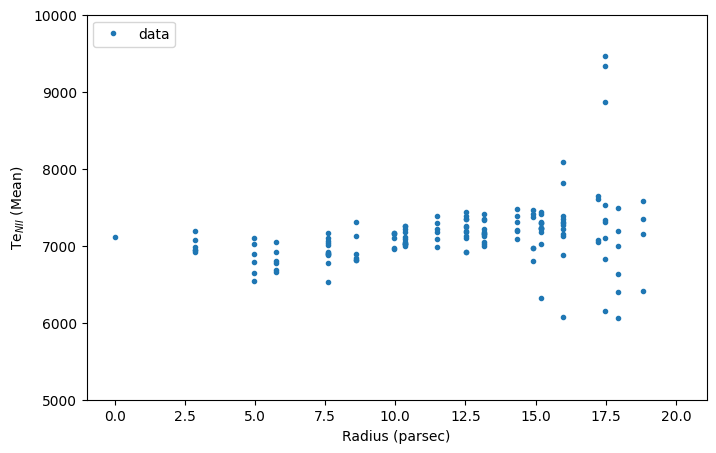

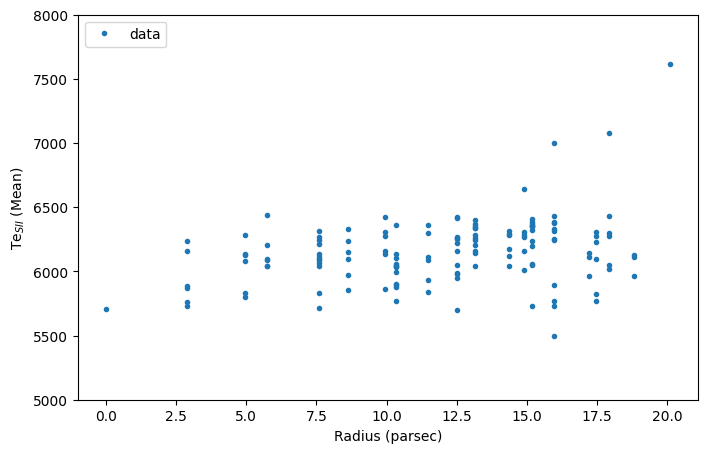

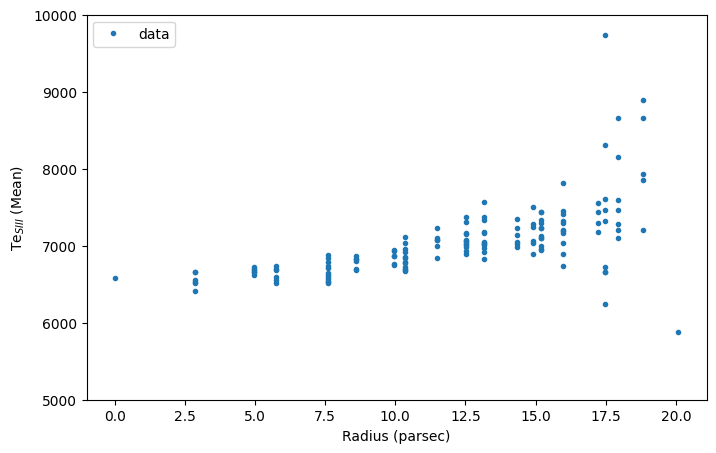

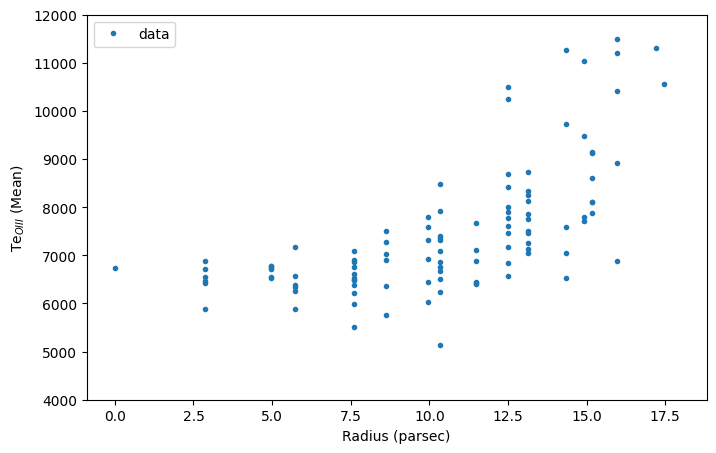

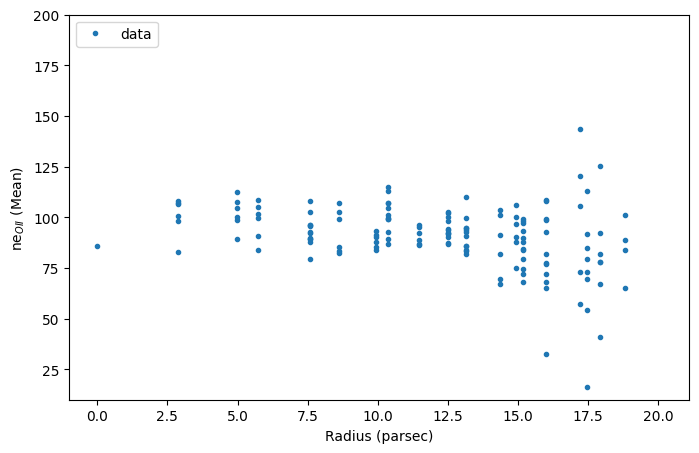

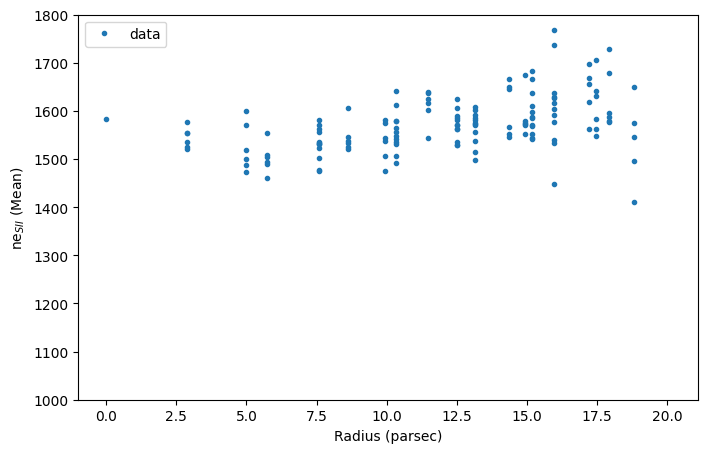

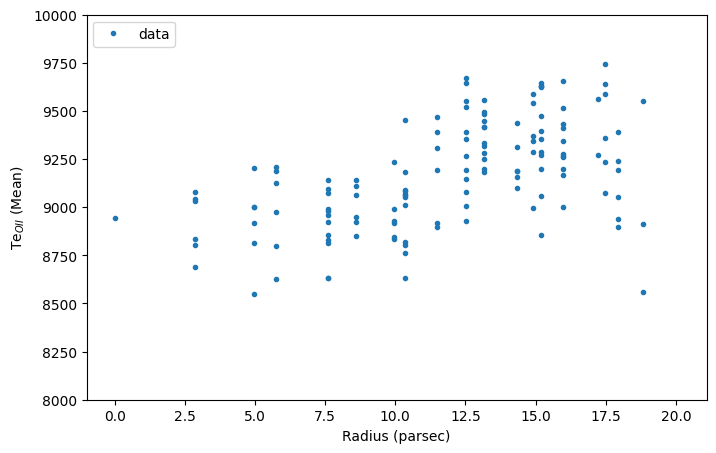

In [10]:
#MakeRadialbin plot profiles
u.plotprofile(u.linefitdict['TeN2'], 5000 , 10000, title=r'Te$_{NII}$ (Mean)', output='TeN2', radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeS2'], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeS3'], 5000 , 10000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeO3'], 4000 , 12000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=False, snbin=False)
u.plotprofile(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=False, snbin=False)
u.plotprofile(u.linefitdict['neS2'], 1000 , 1800, title=r'ne$_{SII}$ (Mean)', output='neS2',  radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeO2'], 8000 , 10000, title=r'Te$_{OII}$ (Mean)', output='TeO2', radbin=False, snbin=False)

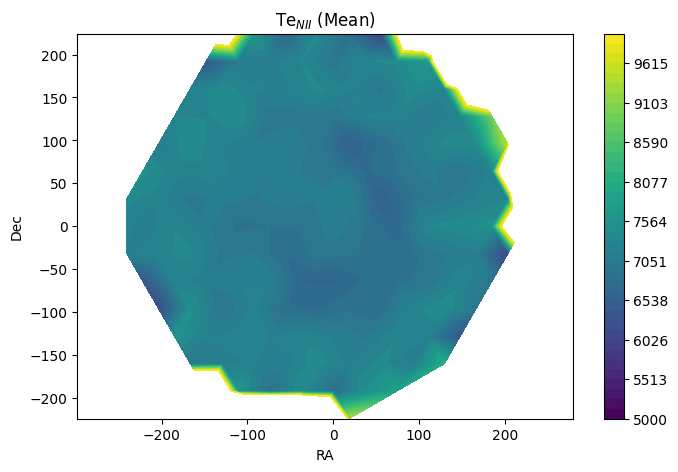

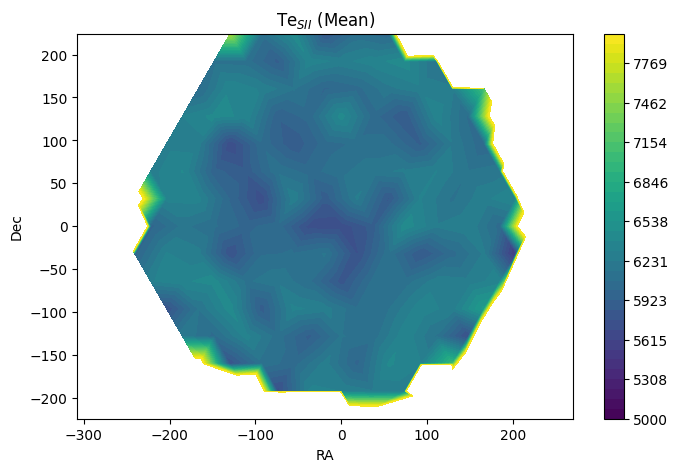

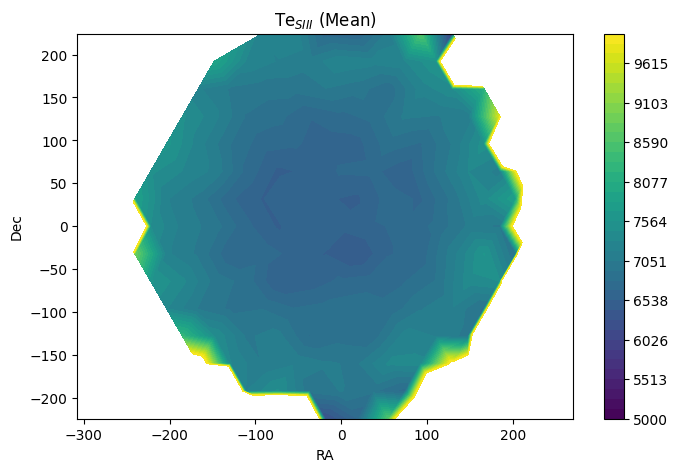

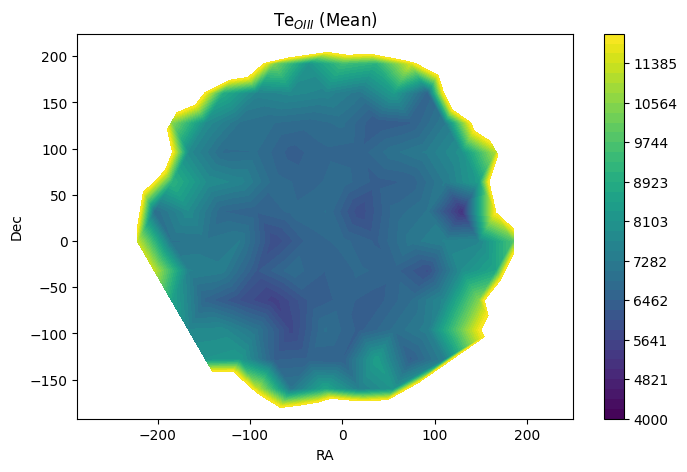

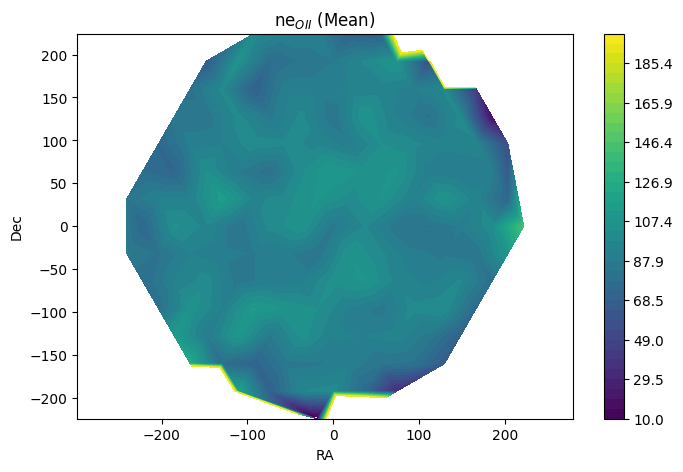

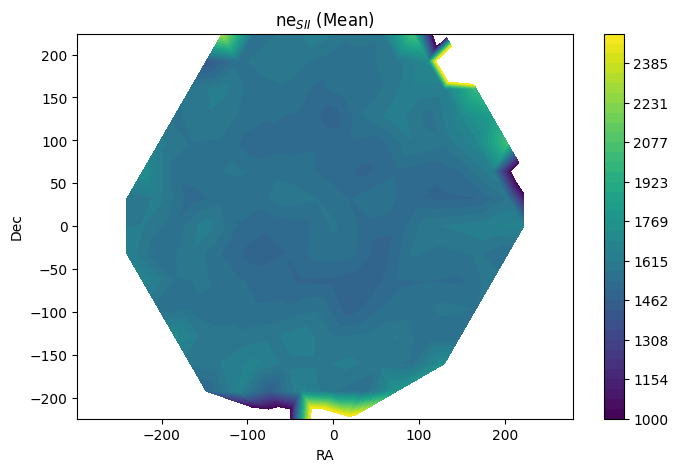

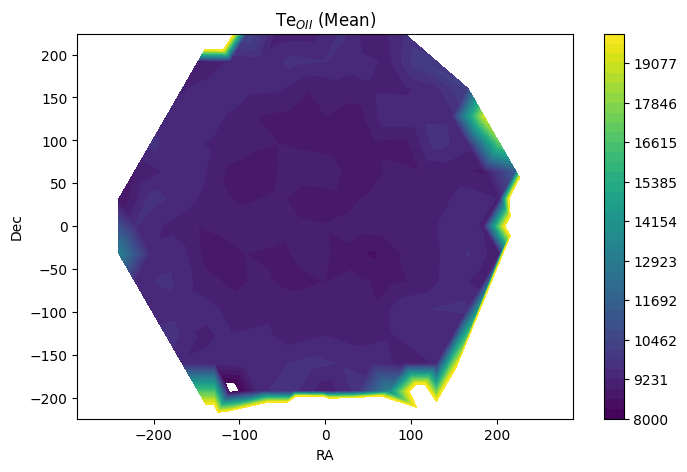

In [12]:
#Make plot profiles
u.plotmap(u.linefitdict['TeN2'], 5000 , 10000, title=r'Te$_{NII}$ (Mean)', output='TeN2', vorbin=False)
u.plotmap(u.linefitdict['TeS2'], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  vorbin=False)
u.plotmap(u.linefitdict['TeS3'], 5000 , 10000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',vorbin=False)
u.plotmap(u.linefitdict['TeO3'], 4000 , 12000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',vorbin=False)
u.plotmap(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     vorbin=False)
u.plotmap(u.linefitdict['neS2'], 1000 , 2500, title=r'ne$_{SII}$ (Mean)', output='neS2',  vorbin=False)
u.plotmap(u.linefitdict['TeO2'], 8000 , 20000, title=r'Te$_{OII}$ (Mean)', output='TeO2', vorbin=False)




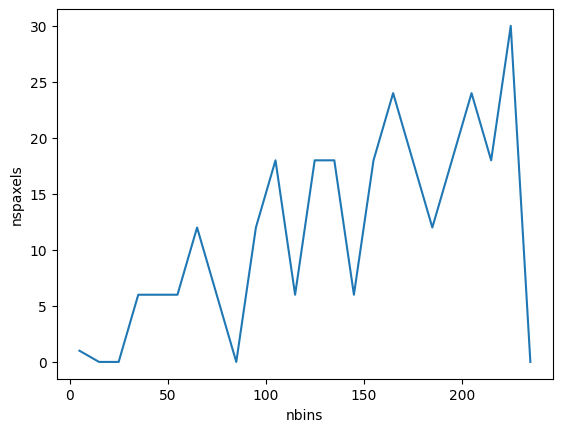

In [11]:
u.radialbin(250, 10)

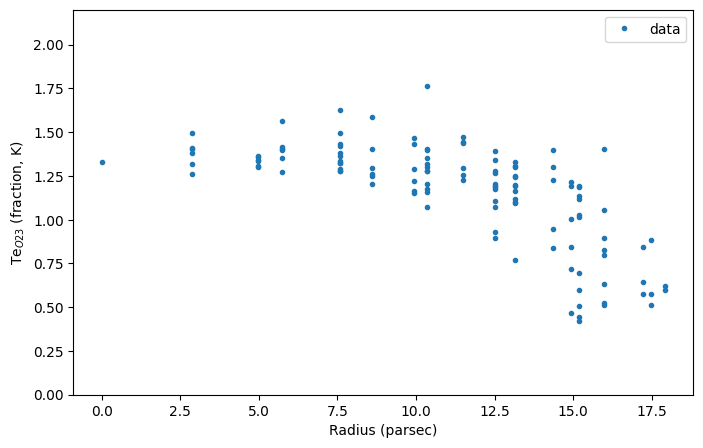

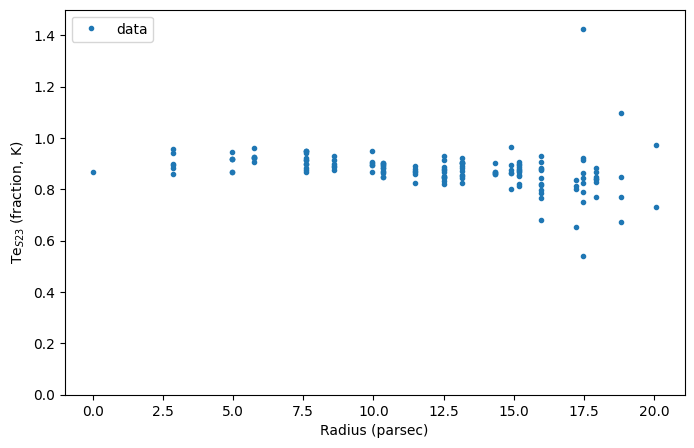

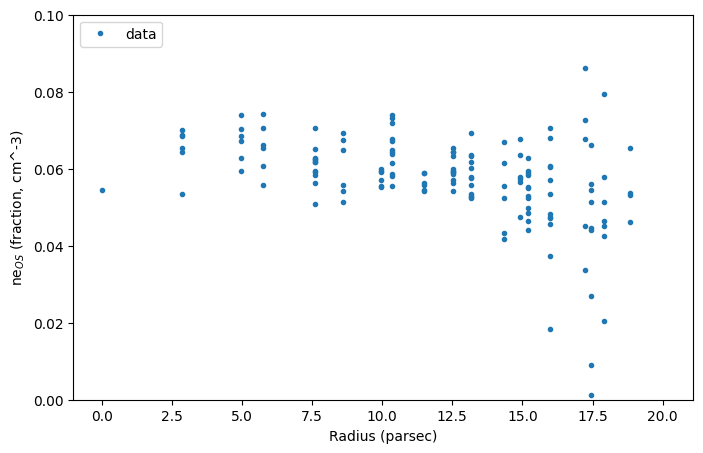

In [13]:
u.plotprofile(np.divide(u.linefitdict['TeO2'], u.linefitdict['TeO3']), 0, 2.2, title=r'Te$_{O23}$ (fraction, K)', output='TeO23 frac',    vorbin=False)
u.plotprofile(np.divide(u.linefitdict['TeS2'], u.linefitdict['TeS3']), 0, 1.5, title=r'Te$_{S23}$ (fraction, K)', output='TeS23 frac',    vorbin=False)
u.plotprofile(np.divide(u.linefitdict['neO2'], u.linefitdict['neS2']), 0, 0.1, title=r'ne$_{OS}$ (fraction, cm^-3)', output='TeOS2 frac', vorbin=False)

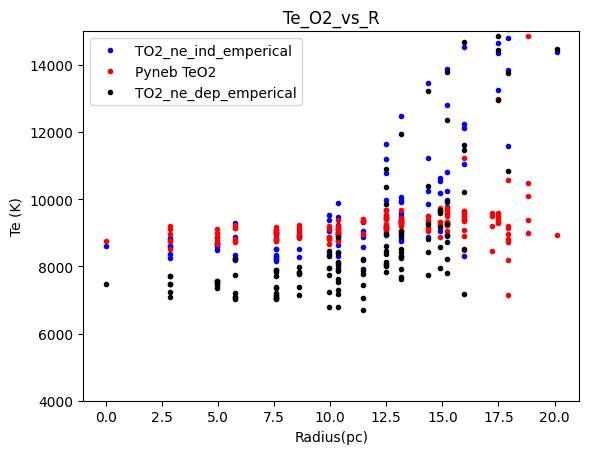

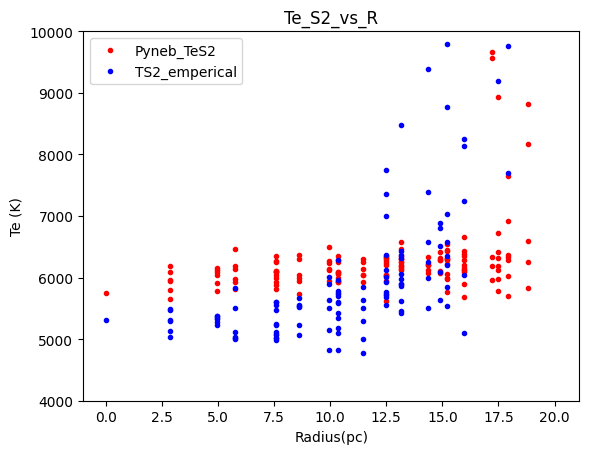

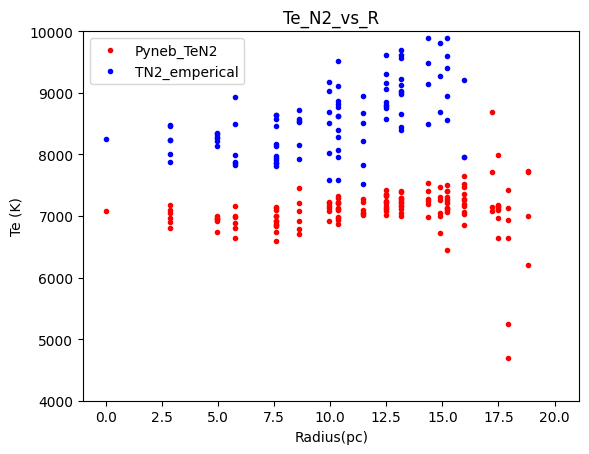

In [30]:
#Reproducing plots from paper 2 on DM chemical abundance determination
distance=16000 #u.pc
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2)
rad=r*distance*np.pi/648000 # converting arcsecs to parsec
#Stasinska et al. 1990, density independent equation
TO2=np.divide(2,(u.linefitdict['TeO3']*10**(-4))**-1 +0.8)*10**(4) #10^4
#print(u.linefitdict['TeO2'], TO2) #what I am getting now in my simulation using Pyneb

#density dependent calibration (Hagele et al. 2006)
T_O2=np.divide(1.2+0.002*100+.042, (u.linefitdict['TeO3']*10**(-4))**-1 +0.08+0.003*100+.025)*10**(4) #10^4
#print(T_O2) #what I am aiming to get in my simulation
fig, ax=plt.subplots()
ax.plot(rad, TO2, '.', color='blue', label='TO2_ne_ind_emperical')
ax.plot(rad, u.linefitdict['TeO2'], '.', color='red', label='Pyneb TeO2')
ax.plot(rad, T_O2, '.', color='black', label='TO2_ne_dep_emperical') 
ax.set_ylim(4000, 15000)
ax.set_title('Te_O2_vs_R')
ax.set_xlabel('Radius(pc)')
ax.set_ylabel('Te (K)')
plt.legend()
plt.savefig('/home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_plotprofile/TeO2_vs_R.png', dpi=300)
plt.show()

#Following equation from Perez-Montero 2003, for ne=100 cm-3 or below
TS2=0.71*T_O2+0.12    
#print(u.linefitdict['TeS2'], 'TS2:', TS2) #similar to pyyneb values
fig, ax1=plt.subplots()
ax1.plot(rad, u.linefitdict['TeS2'], '.', color='red', label='Pyneb_TeS2' )
ax1.plot(rad, TS2, '.', color='blue', label='TS2_emperical')
ax1.set_ylim(4000, 10000)
ax1.set_title('Te_S2_vs_R')
ax1.set_xlabel('Radius(pc)')
ax1.set_ylabel('Te (K)')
plt.legend()
plt.savefig('/home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_plotprofile/TeS2_vs_R.png', dpi=300)
plt.show()

#Following equation from Perez-Montero and contini 2009, for ne=100 cm-3 or below
TN2=np.divide(1.85, (u.linefitdict['TeO3']*10**(-4))**(-1)+0.72)*10**(4)
fig, ax2=plt.subplots()

ax2.plot(rad, u.linefitdict['TeN2'], '.', color='red', label='Pyneb_TeN2' )
ax2.plot(rad, TN2, '.', color='blue', label='TN2_emperical')
ax2.set_ylim(4000, 10000)
ax2.set_title('Te_N2_vs_R')
ax2.set_xlabel('Radius(pc)')
ax2.set_ylabel('Te (K)')
plt.legend()
plt.savefig('/home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_plotprofile/TeN2_vs_R.png', dpi=300)
plt.show()


tl: 0.8888803617097188 
 12+log10(O+/H+): 7.9709630689481115
th: 0.8554791311638724 
 12+log10(O++/H+): 7.464226789124045


/tmp/ipykernel_547995/4184321634.py:24: RuntimeWarning: invalid value encountered in log10
  Abund_O3=np.log10(np.divide((I_4959+I_5007),I_4861))+6.1868+np.divide(1.2491,Th)-0.5816*np.log10(Th)


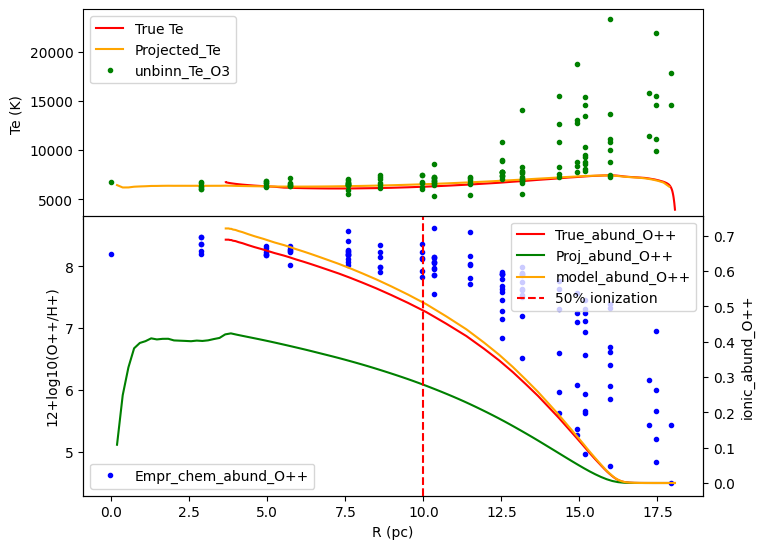

In [27]:

distance=16000 #u.pc
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2)
rad=r*distance*np.pi/648000 # converting arcsecs to parsec

#Chemical abundances of O+ and O++ from paper2 by Perez Montero
I_3726=u.linefitdict['3726_flux']+np.random.randn(u.nfib)*u.linefitdict['3726_flux_err']
I_3729=u.linefitdict['3729_flux']+np.random.randn(u.nfib)*u.linefitdict['3729_flux_err']
I_4861=u.linefitdict['4861_flux']+np.random.randn(u.nfib)*u.linefitdict['4861_flux_err']
Tl=np.nanmean(u.linefitdict['TeN2'])/1e4

Abund_O2=np.log10(np.nanmean(np.divide((I_3726+I_3729),I_4861)))+5.887+np.divide(1.641,Tl)-0.543*np.log10(Tl)+0.000114*100
print('tl:', Tl,'\n','12+log10(O+/H+):', Abund_O2)

#O++
TeO3=u.linefitdict['TeO3']
mask=rad>distance

u.projectedTe(u.vals[6], n=100)
I_4959=u.linefitdict['4959_flux']+np.random.randn(u.nfib)*u.linefitdict['4959_flux_err']
I_5007=u.linefitdict['5007_flux']+np.random.randn(u.nfib)*u.linefitdict['5007_flux_err']
Th=u.linefitdict['TeO3']/1e4


Abund_O3=np.log10(np.divide((I_4959+I_5007),I_4861))+6.1868+np.divide(1.2491,Th)-0.5816*np.log10(Th)
print('th:', np.nanmean(Th),'\n','12+log10(O++/H+):', np.nanmean(Abund_O3))


fig, (ax2, ax)=plt.subplots(2, 1, sharex=True, figsize=(8,7))
ax.plot(rad, Abund_O3, '.', color='blue', label='Empr_chem_abund_O++')
ax1=ax.twinx()
ax1.plot(u.vals[0], u.vals[6], color='red', label='True_abund_O++')
ax1.plot(u.R, u.aproj, color='green', label='Proj_abund_O++')
ax1.plot(u.vals[0], u.vals[6]*1.0461, color='orange', label='model_abund_O++')

ax2.plot(u.vals[0], u.vals[1], color='red', label='True Te')
ax2.plot(u.R, u.Teproj, color='orange', label='Projected_Te')
ax2.plot(rad, TeO3, '.', color='green', label='unbinn_Te_O3')
#ax2.plot(rad[mask], TeO3[mask], '.', color='blue', label='masked_unbin_Te_O3')

ax1.set_position([0.125, 0.71, 0.775, 0.3])  # [left, bottom, width, height]
ax2.set_position([0.125, 0.595, 0.775, 0.3]) 
ax.set_position([0.125, 0.2, 0.775, 0.4])
ax1.axvline(x=10, c='red', linestyle='--', label='50% ionization')

#ax.set_ylim(2, 5)
#ax2.set_ylim(5000, 10000)
ax.set_xlabel('R (pc)')
ax.set_ylabel('12+log10(O++/H+)')
ax1.set_ylabel('ionic_abund_O++')
ax2.set_ylabel('Te (K)')
#ax.set_ylim(2, 5)
#ax.set_xlim(5000, 10000)

ax.legend(loc='lower left')
ax1.legend(loc='upper right')
ax2.legend()
plt.savefig('/home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_plotprofile/unbinned_TeO3_chem_abundO3_vs_R.png', dpi=300)
plt.show()
#Giving diffferent values of abundance with pressing enter again and again


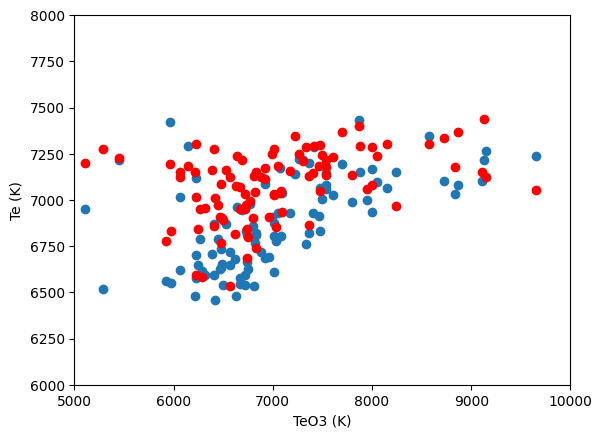

In [18]:
plt.scatter(u.linefitdict['TeO3'], u.linefitdict['TeS3'])
plt.scatter(u.linefitdict['TeO3'], u.linefitdict['TeN2'], color='red')

plt.ylim(6000, 8000)
plt.xlim(5000, 10000)
plt.xlabel('TeO3 (K)')
plt.ylabel('Te (K)')
plt.show()